## knn classification in python

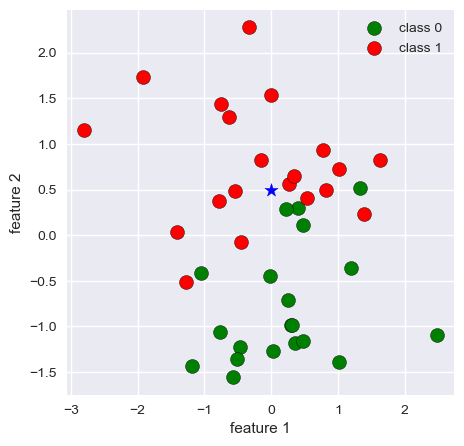

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')


X, y = make_blobs(n_samples = 40, n_features = 2, centers = 2,cluster_std = 0.5, random_state = 5)
X_test = np.array([[0],[0.5]]).T
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.style.use('seaborn')
plt.figure(figsize = (5,5))
plt.scatter(X[y==0,0], X[y==0,1], c= "green", marker= 'o',s=100,edgecolors='black')
plt.scatter(X[y==1,0], X[y==1,1], c= "red", marker= 'o',s=100,edgecolors='black')

plt.scatter(X_test[0,0],X_test[0,1],c="blue",marker='*',s=100)
plt.legend(["class 0","class 1"])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [4]:
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(X,y)
pred = classifier.predict(X_test)
print(pred)

[1]


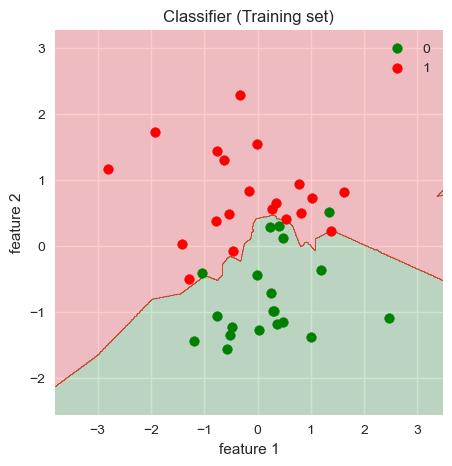

In [5]:
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (5,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for j in np.unique(y_set):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['green', 'red'][j], label = j)
plt.title('Classifier (Training set)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## knn regression in python

In [40]:
np.random.seed(0)
X = np.sort(2 * np.random.rand(100, 1), axis=0)
T = np.linspace(0, 2, 500)[:, np.newaxis]
y = (2*X+1).ravel()#np.sin(X).ravel()
# Add noise
y += 1 * (0.5 - np.random.rand(X.shape[0]))

MAX_K = 9
for i,n_neighbors in enumerate(range(1,MAX_K+1,4)):
    knn = KNeighborsRegressor(n_neighbors)
    y_ = knn.fit(X, y).predict(T)
    plt.figure(1, figsize=(20, 40))
    plt.subplot(MAX_K, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.legend()
    plt.title(f"KNeighborsRegressor (k = {n_neighbors})")
    plt.tight_layout(pad=5.0)
    plt.show()

# ROC curve

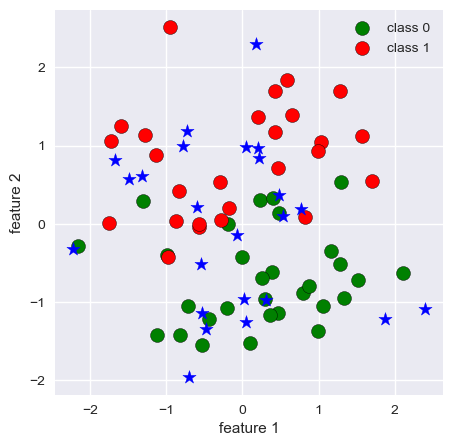

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc


import warnings
warnings.filterwarnings('ignore')


X, y = make_blobs(n_samples = 80, n_features = 2, centers = 2,cluster_std = 0.5, random_state = 5)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.style.use('seaborn')
plt.figure(figsize = (5,5))
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], c= "green", marker= 'o',s=100,edgecolors='black')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c= "red", marker= 'o',s=100,edgecolors='black')
plt.scatter(X_test[:,0],X_test[:,1],c="blue",marker='*',s=100)
plt.legend(["class 0","class 1"])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

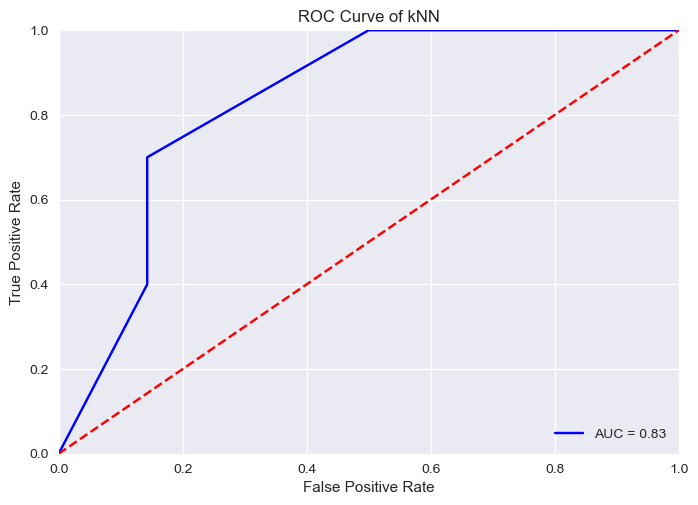

In [36]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()